In [1]:
import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt

In [20]:
engram_dir = '/Users/chingfang/temp_locker/'

In [21]:
# Set up parameters
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Device: {DEVICE}')
checkpoints_dir = f'{engram_dir}checkpoints/'
tensorboard_dir = f'{engram_dir}tensorboard/'
n_timesteps = 5

Device: cpu


# PNET

### Forward filter

In [58]:
# Which network to test
pnet_name = 'pnet'
chckpt = 50

In [59]:
state_dict = torch.load(
    f"{checkpoints_dir}{pnet_name}/{pnet_name}-{chckpt}-regular.pth",
    map_location=torch.device('cpu')
    )

In [60]:
conv1 = state_dict['backbone.speech_branch.conv1.block.0.weight']

In [61]:
# out_channels, groups/in_channels, kernel size 0, kernel size 1

In [62]:
n_filters = conv1.shape[0]

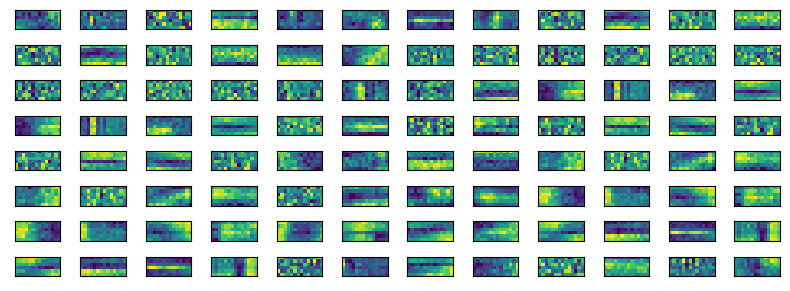

In [63]:
fig, axs = plt.subplots(8, 12, figsize=(8,3))
for i in range(8):
    for j in range(12):
        ax = axs[i][j]
        filt = conv1[i*8 + j, 0]
        ax.imshow(filt)
        ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

### Feedback filter

In [64]:
state_dict['pcoder1.pmodule.1.weight'].shape

torch.Size([96, 1, 3, 3])

In [65]:
fb_conv1 = state_dict['pcoder1.pmodule.1.weight']

In [66]:
# out_channels, groups/in_channels, kernel size 0, kernel size 1

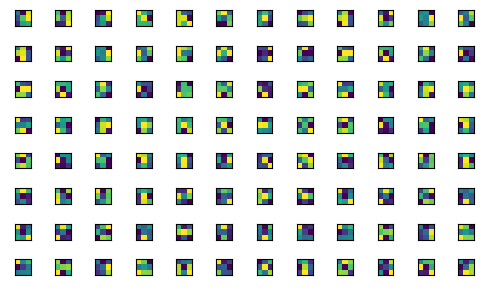

In [67]:
fig, axs = plt.subplots(8, 12, figsize=(5,3))
for i in range(8):
    for j in range(12):
        ax = axs[i][j]
        filt = fb_conv1[i*8 + j, 0]
        ax.imshow(filt)
        ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

# PNET-Noisy

### Forward filter

In [68]:
# Which network to test
pnet_name = 'pnet_snr-9_Babble8Spkr'
chckpt = 70

In [69]:
state_dict = torch.load(
    f"{checkpoints_dir}{pnet_name}/{pnet_name}-{chckpt}-regular.pth",
    map_location=torch.device('cpu')
    )

In [70]:
conv1 = state_dict['backbone.speech_branch.conv1.block.0.weight']

In [71]:
# out_channels, groups/in_channels, kernel size 0, kernel size 1

In [72]:
n_filters = conv1.shape[0]

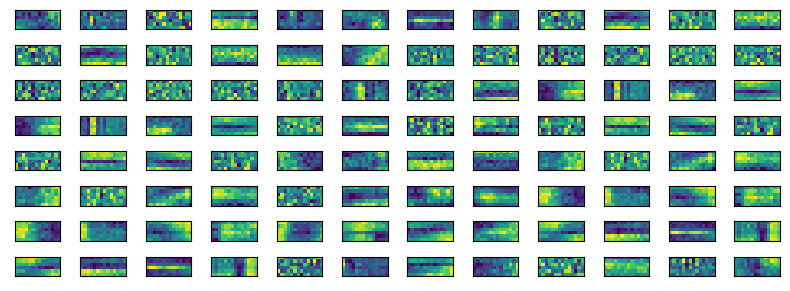

In [73]:
fig, axs = plt.subplots(8, 12, figsize=(8,3))
for i in range(8):
    for j in range(12):
        ax = axs[i][j]
        filt = conv1[i*8 + j, 0]
        ax.imshow(filt)
        ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

### Feedback filter

In [74]:
state_dict['pcoder1.pmodule.1.weight'].shape

torch.Size([96, 1, 3, 3])

In [75]:
fb_conv1 = state_dict['pcoder1.pmodule.1.weight']

In [76]:
# out_channels, groups/in_channels, kernel size 0, kernel size 1

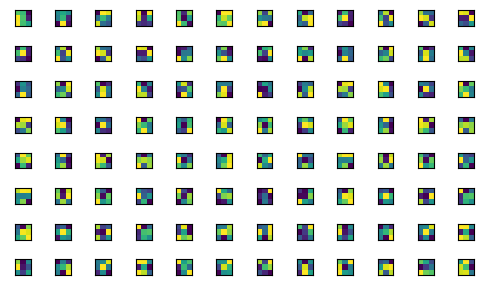

In [77]:
fig, axs = plt.subplots(8, 12, figsize=(5,3))
for i in range(8):
    for j in range(12):
        ax = axs[i][j]
        filt = fb_conv1[i*8 + j, 0]
        ax.imshow(filt)
        ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()